# Datensätze
Author: Jakob Jerratsch

Für diese Arbeit nutze ich zwei Datensätze mit Songs von Spotify. 
Der erste beinhaltet die 10.000 erfolgreichsten Songs aus den Jahren 1950-2024 auf Spotify (Stand 2024) mit Release-Datum.
Der zweite enthält fast 1.000.000 Songs mit dazugehörigen Songtexten.
Außerdem erstelle ich einen dritten Datensatz, in dem ich die beiden Datensätze zusammenführe, um die Songtexte der Hit-Songs zu bekommen.

Beide Datensätze enthalten die Metadaten von Spotify, die "Spotify-Attribute", mit denen Spotify den Songs Werte gibt, um sie miteinander zu vergleichen. Im ersten Datensatz sind noch weitere Metadaten enthalten, im zweiten die Songtexte.
Ich werde in dieser Arbeit beide Datensätze analysieren und miteinander vergleichen, um herauszufinden, ob und wie sich die 10.000 erfolgreichsten Songs von der großen Menge der fast 1 Millionen Songs unterscheiden.

Im dritten Teil analysiere ich die Texte der Songs und suche in den Texten nach Gemeinsamkeiten und Unterschieden.

# Teil 1
## Daten aufbereiten
In diesem Vorbereitungsteil bearbeite ich die Datensätze und erstelle neue, erweiterte und gefilterte Versionen von ihnen, die ich dann in Teil 2 analysiere. 

Ich suche nach fehlenden Werten und mehrfachen Einträgen, erstelle Spalten für Release-Dates und einen dritten Dataframe, der die beiden Datensätze zusammenführt.

### QUELLEN
Datensatz 1 - Quelle: https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now

Datensatz 2 - Quelle: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics

### Daten importieren

In [1]:
#Daten importieren
import pandas as pd

df1 = pd.read_csv('top_10000_1950-now.csv')
df2 = pd.read_csv('songs_with_attributes_and_lyrics.csv')

In [2]:
#Allgemeine Infos zu den Datensätzen
print(df1.info())
print(df1.head())
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             10000 non-null  object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9998 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9998 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9998 non-null   object 
 7   Album Artist Name(s)  9998 non-null   object 
 8   Album Release Date    9998 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           10000 non-null  int64  
 11  Track Number          10000 non-null  int64  
 12  Track Duration (ms)   10000 non-null  int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              10000 non-null  bool   
 15  Popularity          

# Dataframe 1

## Missing Values finden

In [3]:
#Fehlende Werte finden
missing_values = df1.isnull().sum()
print(missing_values[missing_values > 0])

Track Name                  2
Artist URI(s)               2
Artist Name(s)              2
Album URI                   2
Album Name                  2
Album Artist URI(s)         2
Album Artist Name(s)        2
Album Release Date          2
Album Image URL             4
Track Preview URL          63
ISRC                        4
Artist Genres             551
Danceability                5
Energy                      5
Key                         5
Loudness                    5
Mode                        5
Speechiness                 5
Acousticness                5
Instrumentalness            5
Liveness                    5
Valence                     5
Tempo                       5
Time Signature              5
Album Genres            10000
Label                       7
Copyrights                 23
dtype: int64


Wie wir sehen, gibt es zwei Songs, zu denen fast keine Daten vorhanden sind, diese lösche ich. Weiterhin fünf Songs, zu denen die Spotify-Attribute fehlen. 

Weiterhin ist die Spalte Album Genres komplett leer ist, es fehlen alle 10000 Einträge. Diese Spalte wird gelöscht.

Dann fehlen hauptstächlich noch Genre-Zuordnungen, was immerhin 551 Songs und damit 5% der Daten betrifft. 5% der Daten sind natürlich eine große Menge, wenn es um statistisch relevante Aussagen geht, aber mit 95% der Genres kann ich gut einschätzen, wie die Genres im Großen und Ganzen verteilt sind.

Weiterhin fehlen 63 Track Preview URLs und 23 Copyrights, was für diese Analyse nicht weiter stört. Die restlichen fehlenden Werte sind in einem vernachlässigbaren Bereich.

Schauen wir uns zuerst die Daten der unzureichenden Songs an:

In [4]:
# Zeilen anzeigen, in denen entweder der Track Name oder der Artist Name fehlt
missing_values = df1[df1['Track Name'].isnull() | df1['Artist Name(s)'].isnull()]
print("Zeilen mit fehlendem Track Name oder Artist Name:")
print(missing_values)

Zeilen mit fehlendem Track Name oder Artist Name:
                                 Track URI Track Name  \
387   spotify:track:1C79CxJdMHjk9RkwX04DRh        NaN   
6778  spotify:track:4FtEKK21hvAqtn3LRT6tW2        NaN   

                              Artist URI(s) Artist Name(s)  \
387   spotify:artist:0LyfQWJT6nXafLPZqxe9Of            NaN   
6778  spotify:artist:0LyfQWJT6nXafLPZqxe9Of            NaN   

                                 Album URI Album Name  \
387   spotify:album:535qZk6ycJqQaa5qFPmq3k        NaN   
6778  spotify:album:58rbGtypokiMYSrfXDlAgN        NaN   

                        Album Artist URI(s) Album Artist Name(s)  \
387   spotify:artist:0LyfQWJT6nXafLPZqxe9Of      Various Artists   
6778  spotify:artist:0LyfQWJT6nXafLPZqxe9Of      Various Artists   

     Album Release Date Album Image URL  ...  Speechiness  Acousticness  \
387                0000             NaN  ...       0.0519        0.0228   
6778               0000             NaN  ...       0.0387       

Die Zeilen 387 und 6778 beinhalten keine für diese Analyse relevanten Informationen und können gelöscht werden.

In [5]:
# Lösche die Zeilen 387 und 6778 aus df1
df1.drop(index=[387, 6778], inplace=True)

# Überprüfe die neuen Dimensionen des DataFrames
print("DataFrame nach dem Löschen der Zeilen 387 und 6778:")
print(df1.info())

DataFrame nach dem Löschen der Zeilen 387 und 6778:
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9998 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9996 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9996 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9996 non-null   object 
 7   Album Artist Name(s)  9996 non-null   object 
 8   Album Release Date    9996 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           9998 non-null   int64  
 11  Track Number          9998 non-null   int64  
 12  Track Duration (ms)   9998 non-null   int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              999

Weiterhin löschen wir die Spalte Album Genres:

In [6]:
# Lösche die Spalte 'Album Genres' aus df1
df1.drop(columns=['Album Genres'], inplace=True)

# Überprüfe die neuen Dimensionen des DataFrames
print("DataFrame nach dem Löschen der Spalte 'Album Genres':")
print(df1.info())

DataFrame nach dem Löschen der Spalte 'Album Genres':
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9998 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9996 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9996 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9996 non-null   object 
 7   Album Artist Name(s)  9996 non-null   object 
 8   Album Release Date    9996 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           9998 non-null   int64  
 11  Track Number          9998 non-null   int64  
 12  Track Duration (ms)   9998 non-null   int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              9

In [7]:
# Zeilen anzeigen, in denen Danceability fehlt
missing_danceability = df1[df1['Danceability'].isnull()]
print("Zeilen mit fehlender Danceability:")
print(missing_danceability)

Zeilen mit fehlender Danceability:
                                              Track URI  \
2079  spotify:local:The+Beatles:1962-1966:You%27ve+G...   
2179               spotify:track:5cY8y2XgOfkAh4kSWLFKkz   
2927               spotify:track:4G4JPYTyBTUHMRA3LIueZm   
6980               spotify:track:6yuvC80FcnVJNvC0DbXN9e   
7565  spotify:local:Koo+De+Tah:Too+Young+For+Promise...   

                                 Track Name  \
2079      You've Got To Hide Your Love Away   
2179             I Write Sins Not Tragedies   
2927                              Your Song   
6980  Come to Me (feat. Nicole Scherzinger)   
7565                 Too Young For Promises   

                                          Artist URI(s)  \
2079                                                NaN   
2179              spotify:artist:20JZFwl6HVl6yg8a4H3ZqK   
2927              spotify:artist:3PhoLpVuITZKcymswpck5b   
6980  spotify:artist:59wfkuBoNyhDMQGCljbUbA, spotify...   
7565                            

#### Versuch: Die fehlenden Daten von Spotify herunterladen und den DataFrame ergänzen

In [8]:
#!pip install spotipy

In [9]:
"""
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Authentifizierung
#client_id = '...'
#client_secret = '...'
credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

# Funktion zum Abrufen der Danceability
def get_danceability(track_uri):
    try:
        track_info = sp.track(track_uri)
        return track_info['danceability']
    except Exception as e:
        print(f"Fehler beim Abrufen von {track_uri}: {e}")
        return None

# Iteriere über die Zeilen mit fehlender Danceability
for index, row in df1[df1['Danceability'].isnull()].iterrows():
    track_uri = row['Track URI']
    danceability = get_danceability(track_uri)
    df1.at[index, 'Danceability'] = danceability

# Überprüfe die aktualisierten Werte
print(df1[df1['Danceability'].isnull()])
"""

'\nimport spotipy\nfrom spotipy.oauth2 import SpotifyClientCredentials\nimport pandas as pd\n\n# Authentifizierung\n#client_id = \'...\'\n#client_secret = \'...\'\ncredentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)\nsp = spotipy.Spotify(client_credentials_manager=credentials)\n\n# Funktion zum Abrufen der Danceability\ndef get_danceability(track_uri):\n    try:\n        track_info = sp.track(track_uri)\n        return track_info[\'danceability\']\n    except Exception as e:\n        print(f"Fehler beim Abrufen von {track_uri}: {e}")\n        return None\n\n# Iteriere über die Zeilen mit fehlender Danceability\nfor index, row in df1[df1[\'Danceability\'].isnull()].iterrows():\n    track_uri = row[\'Track URI\']\n    danceability = get_danceability(track_uri)\n    df1.at[index, \'Danceability\'] = danceability\n\n# Überprüfe die aktualisierten Werte\nprint(df1[df1[\'Danceability\'].isnull()])\n'

Der Fehler scheint hier bei Spotify zu liegen - das herunterladen war erfolgreich, die Werte sind aber nicht vorhanden.

Diese fünf Songs haben nicht genug Werte, um sie in die univariate Analyse mit einzubeziehen, also legen wir einen neuen, gefilterten DataFrame ohne sie an.

### Anlegen eines Gefilterten DataFrames, Werte überprüfen

In [10]:
## Neuer DataFrame df1_filtered, ohne die unvollständigen Zeilen
df1_filtered = df1.drop(index=[2079, 2179, 2927, 6980, 7565])

## Überprüfe df1_filtered
print("Neuer DataFrame df1_filtered ohne die angegebenen Zeilen:")
print(df1_filtered.info())


Neuer DataFrame df1_filtered ohne die angegebenen Zeilen:
<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9993 non-null   object 
 1   Track Name            9993 non-null   object 
 2   Artist URI(s)         9993 non-null   object 
 3   Artist Name(s)        9993 non-null   object 
 4   Album URI             9993 non-null   object 
 5   Album Name            9993 non-null   object 
 6   Album Artist URI(s)   9993 non-null   object 
 7   Album Artist Name(s)  9993 non-null   object 
 8   Album Release Date    9993 non-null   object 
 9   Album Image URL       9993 non-null   object 
 10  Disc Number           9993 non-null   int64  
 11  Track Number          9993 non-null   int64  
 12  Track Duration (ms)   9993 non-null   int64  
 13  Track Preview URL     9934 non-null   object 
 14  Explicit           

In [11]:
#Überprüfe Fehlende Werte
missing_values = df1_filtered.isnull().sum()
print(missing_values[missing_values > 0])

Track Preview URL     59
Artist Genres        547
Label                  3
Copyrights            19
dtype: int64


Jetzt fehlen nur noch einige Track Preview-Urls, Labels und Copyrights, die nicht für die Analyse gebraucht werden. Weiterhin fehlen noch etwa 5% der Artist Genres.

## Releasedaten herausziehen: Release-Dates als Zahl in Spalten umspeichern

Nun wandle ich die Release-Daten, die als String vorliegen in Zahlen und teile sie in Jahr, Monat und Tag auf.

In [12]:
df1_unique_release = df1_filtered['Album Release Date'].unique()
print(df1_unique_release)

['2009' '2003-01-14' '2016-05-06' ... '2004-04-01' '2010-02-09'
 '1997-10-27']


In [13]:
import numpy as np

# Jahr, Monat und Tag auslesen, NaN durch 0 ersetzen
df1_filtered['Release Year'] = df1_filtered['Album Release Date'].str.extract(r'(\d{4})')[0].fillna(0).astype(int)
df1_filtered['Release Month'] = df1_filtered['Album Release Date'].str.extract(r'-(\d{2})-')[0].fillna(0).astype(int)
df1_filtered['Release Day'] = df1_filtered['Album Release Date'].str.extract(r'-(\d{2})$')[0].fillna(0).astype(int)

# 0 wieder durch NaN ersetzen
df1_filtered['Release Month'] = df1_filtered['Release Month'].replace(0, np.nan)
df1_filtered['Release Day'] = df1_filtered['Release Day'].replace(0, np.nan)

# Zeilen mit NaN-Werten in den neuen Spalten anzeigen
nan_rows = df1_filtered[df1_filtered[['Release Year', 'Release Month', 'Release Day']].isna().any(axis=1)]
print(nan_rows[['Album Release Date', 'Release Year', 'Release Month', 'Release Day']])

# Überprüfen der neuen Spalten
print("\n")
print(df1_filtered[['Album Release Date', 'Release Year', 'Release Month', 'Release Day']].sample(20))
print("\n")
print(df1_filtered[['Release Year', 'Release Month', 'Release Day']].dtypes)

# Überprüfen der fehlenden Werte
missing_values = df1_filtered[['Release Month', 'Release Day']].isnull().sum()
print("\nFehlende Werte:")
print(missing_values)


     Album Release Date  Release Year  Release Month  Release Day
0                  2009          2009            NaN          NaN
8                  2007          2007            NaN          NaN
11                 2004          2004            NaN          NaN
13                 1981          1981            NaN          NaN
16                 1995          1995            NaN          NaN
...                 ...           ...            ...          ...
9955               1991          1991            NaN          NaN
9960               1996          1996            NaN          NaN
9965               1962          1962            NaN          NaN
9986               2005          2005            NaN          NaN
9999               1981          1981            NaN          NaN

[1303 rows x 4 columns]


     Album Release Date  Release Year  Release Month  Release Day
9405         2021-08-13          2021            8.0         13.0
813          2013-09-12          2013            

Die Release-Dates waren als String im Format YYY-MM-DD abgespeichert. Den habe ich auseinandergenommen und in einzelne Spalten gespeichert. Jetzt werden die Spalten in Ganzzahlen umgewandelt, um mit den Release-Daten arbeiten zu können.

Einige Monate und Tage waren nicht vorhanden, sie werden durch NaN ersetzt.

Jetzt sind alle Spalten im richtigen Format und die für die Analyse störenden Spalten entfernt. Weiter geht es mit dem zweiten DataFrame

## Suche nach Duplikaten

Als nächstes prüfe ich die Songs auf Duplikate, zuerst suche ich nach mehrfach vorhandenen IDs.

In [14]:
anzahl_vorher = df1_filtered.shape[0]
print(f"Vorher: {anzahl_vorher}")

# Duplikate löschen
df1_filtered = df1_filtered.drop_duplicates(subset='Track URI', keep='first').reset_index(drop=True)

print(f"Gefiltert: {anzahl_vorher-df1_filtered.shape[0]}")
print(f"Nachher: {df1_filtered.shape[0]}")

Vorher: 9993
Gefiltert: 48
Nachher: 9945


Es kann durchaus vorkommen, dass gleiche Tracks unter verschiedenen IDs in den Datensätzen sind. Um das abzufangen, suche ich nach Duplikaten von Songtiteln der gleichen Künstler. 
Um bessere Ergebnisse zu bekommen, normalisiere ich Track Name und Artist Name.

In [15]:
import re
import unicodedata

# clean text entfernt alle Sonderzeichen, normalisiert Buchstaben mit Akzenten drüber und ersetzt mehrfache Leerzeichen.
def clean_text(s):
    if pd.isna(s):
        return s
    s = str(s)

    # Unicode normalisieren (z. B. é → e)
    s = unicodedata.normalize('NFKD', s)
    s = ''.join(ch for ch in s if not unicodedata.combining(ch))
    
    # Apostrophe entfernen
    s = re.sub(r"[\u0027\u2018\u2019\u201A\u201B\u2032\u2035\u201C\u201D\u201E\u201F]", " ", s)
    # Bindestriche entfernen
    s = s.replace('-', ' ')
    # Sonderzeichen entfernen
    s = re.sub(r"[^a-zA-Z0-9\s'\-]", ' ', s)
    # Mehrfache Leerzeichen entfernen
    s = re.sub(r'\s+', ' ', s)
    
    # Kleinschreibung
    s = s.lower()
    
    # überflüssige leerzeichen entfernen
    s = s.strip()
    return s

# clean text anwenden
df1_filtered['artists_normalized'] = df1_filtered['Artist Name(s)'].apply(clean_text)
df1_filtered['name_normalized']    = df1_filtered['Track Name'].apply(clean_text)
pairs = set(zip(df1_filtered['artists_normalized'], df1_filtered['name_normalized']))

In [16]:
print("Anzahl der Zeilen vorher:", df1_filtered.shape[0])

# Duplikate löschen
unique_df1 = df1_filtered.drop_duplicates(subset=['artists_normalized', 'name_normalized'], keep='first').copy()

print("Anzahl der Zeilen nach dem Entfernen von Duplikaten:", unique_df1.shape[0])

Anzahl der Zeilen vorher: 9945
Anzahl der Zeilen nach dem Entfernen von Duplikaten: 8892


Aus dem Datensatz konnte ich knapp 1100 doppelte Songs rausfiltern. Der Datensatz ist jetzt aussagekräftiger.

### Speichern

DF1 wird gesichert:

In [17]:
df1_save = unique_df1

# Dataframe 2: 955320 Songs mit Lyrics

Nun untersuche ich Dataframe 2. 

In [18]:
#Allgemeine Infos
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955320 entries, 0 to 955319
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                955320 non-null  object 
 1   name              955309 non-null  object 
 2   album_name        385557 non-null  object 
 3   artists           955318 non-null  object 
 4   danceability      955320 non-null  float64
 5   energy            955320 non-null  float64
 6   key               955320 non-null  object 
 7   loudness          955320 non-null  float64
 8   mode              955320 non-null  object 
 9   speechiness       955320 non-null  float64
 10  acousticness      955320 non-null  float64
 11  instrumentalness  955320 non-null  float64
 12  liveness          955320 non-null  float64
 13  valence           955320 non-null  float64
 14  tempo             955320 non-null  float64
 15  duration_ms       955320 non-null  float64
 16  lyrics            95

In [19]:
#Fehlende Werte überprüfen
missing_values = df2.isnull().sum()
print(f"{missing_values.where(missing_values > 0).dropna()}")

name              11.0
album_name    569763.0
artists            2.0
lyrics            13.0
dtype: float64


Auffällig viele Albumtitel sind in diesem Datensatz nicht vorhanden, etwa 60% fehlen.
Weiterhin fehlen 11 Songtitel und 13 Lyrics. Für die Betrachtung der Spotify-Features in der Analyse sind diese zu vernachlässigen. Im dritten Teil, der Textanalyse, werde ich die Songs mit fehlenden Songtexten aus dem Datensatz entfernen.

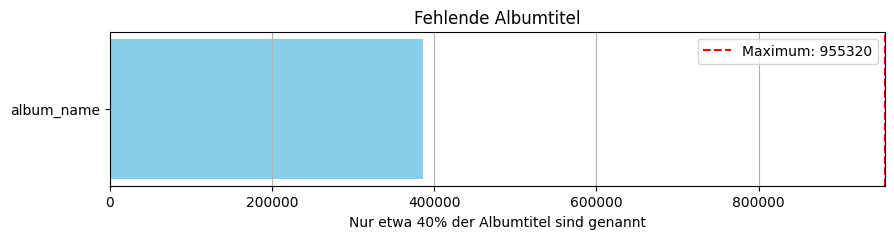

In [20]:
import matplotlib.pyplot as plt

# Werte definieren
max_value = 955320
filled_value = 385557

# Diagramm erstellen
plt.figure(figsize=(10, 2))
plt.barh('album_name', filled_value, color='skyblue')
plt.xlim(0, max_value)  # Setze die x-Achse auf das Maximum
plt.title('Fehlende Albumtitel')
plt.xlabel('Nur etwa 40% der Albumtitel sind genannt')
plt.grid(axis='x')
plt.axvline(x=max_value, color='red', linestyle='--', label='Maximum: 955320')
plt.legend()

plt.show()


Ich versuche, die Daten zu vervollständigen und Künstlername, bzw. Songtitel von Spotify zu beziehen:

In [21]:
"""
import requests
import json

client_id = '...'  
client_secret = '...' 

# Abrufen des Access Tokens
url = 'https://accounts.spotify.com/api/token'
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}
data = {
    'grant_type': 'client_credentials',
}
response = requests.post(url, headers=headers, data=data, auth=(client_id, client_secret))
access_token = response.json().get('access_token')

# Liste der Song-IDs
track_ids = [
    '2Q5cMgzptSupzvvWtZTyVg',
    '7BGQCe62A58Q5ZgpQFX93t',
    '13vP95VYqHp3dN6TjGZ12s',
    '1KFjbnC7IRtkCh5MEJhWt9',
    '3VKFip3OdAvv4OfNTgFWeQ',
    '3bN0ClUvRz8289XE7tNW0k',
    '4zMgP1HJazJJdEf6AiG8M6',
    '5N0MQFuudsDIQpapNI5MHM',
    '5R8xbq4SXB5Cc62Lu7cW4y',
    '5cjecvX0CmC9gK0Laf5EMQ',
    '7gi1gHXljCBwbBAF7Rhdwk'
]

# Abrufen von Song-Informationen und Ausgabe
for track_id in track_ids:
    url = f'https://api.spotify.com/v1/tracks/{track_id}'
    headers = {
        'Authorization': f'Bearer {access_token}',
    }
    response = requests.get(url, headers=headers)
    track_info = response.json()
    
    title = track_info.get('name')
    artists = ', '.join(artist['name'] for artist in track_info.get('artists', []))
    print(f'Titel: {title}, Künstler: {artists}')


"""
print()

Für diese ausgewählten IDs sind bei Spotify keine weiteren Informationen über Künstler und Titel hinterlegt. Die Spotify-Attribute sind aber vorhanden, damit können sie erstmal im Datensatz bleiben.

## Spalten aufräumen

Mit einem Blick auf die Inhalte der Spalten, die ich benutzen möchte, sehe ich, dass einige Spotify-Attribute nicht sauber eingetragen sind. 

key und mode sind noch als Objekte, also wahrscheinlich als strings eingetragen. Diese schaue ich mir noch mal näher an

In [22]:
print(df2['key'].unique())
print(df2['key'].value_counts(dropna=False))

['7' '5' '2' '1' '9' '0' '4' 'F' '6' '8' '7.0' 'C#' '8.0' 'C' '3' 'A#'
 '10.0' '11' 'F#' 'A' 'D#' '11.0' '10' '1.0' 'E' '6.0' 'G' '0.0' 'D' '2.0'
 '5.0' 'B' '9.0' '4.0' 'G#' '3.0']
key
7       94773
0       92882
2       86809
9       86169
1       69353
4       64616
5       62753
11      60750
6       48938
10      48499
8       46947
3       24176
0.0     12497
7.0     12324
2.0     11172
9.0     10870
1.0     10577
11.0     8786
5.0      8758
4.0      8476
6.0      7410
8.0      7108
C        7081
G        6909
10.0     6824
A        6131
C#       6001
D        5930
B        5109
F        4810
E        4558
F#       4116
G#       4031
A#       3847
3.0      3588
D#       1742
Name: count, dtype: int64


Hier sind von Spotify normalerweise Integer von 0 bis 11 eingetragen, für die Tonarten C = 0, C# = 1, D = 2 usw. 

Da die Anzahl der Einträge überschaubar ist, löse ich das durch ein direktes Mapping und weise den Einträgen die passenden Zahlen zu, da man mit diesen gut weiterarbeiten kann.

In [23]:
import pandas as pd

s = df2['key'].astype(str).str.strip()        # string-normalisieren

# Noten als Zahlenwerte (Info aus Spotify-Datensatz)
s = s.replace({'C#': '1', 'D#': '3', 'F#': '6', 'G#': '8', 'A#': '10',
               'C': '0', 'D': '2', 'E': '4', 'F': '5', 'G': '7', 'A': '9', 'B': '11'})

# 2) Konvertiere alle zu Zahlen, ungültige werden NaN
num = pd.to_numeric(s, errors='coerce')

# 3) Integer erzwingen
df2['key'] = num.astype('Int8')

print(df2['key'].unique())
print(df2['key'].value_counts(dropna=False))

<IntegerArray>
[7, 5, 2, 1, 9, 0, 4, 6, 8, 3, 10, 11]
Length: 12, dtype: Int8
key
7     114006
0     112460
2     103911
9     103170
1      85931
4      77650
5      76321
11     74645
6      60464
10     59170
8      58086
3      29506
Name: count, dtype: Int64


Genauso gehe ich auch bei den Keys Dur und Moll vor, die durch 1 (Dur) und 0 (Moll) ersetzt werden:

In [24]:
#Fehlererkennung - Gleichmäßige Benennung von key und mode 

print(df2['mode'].unique())
print(df2['mode'].value_counts(dropna=False))

['1' '0' 'Major' '1.0' 'Minor' '0.0']
mode
1        523391
0        263274
1.0       69711
Major     39509
0.0       38679
Minor     20756
Name: count, dtype: int64


In [25]:
import pandas as pd

s = df2['mode'].astype(str).str.strip().str.lower()  # string-normalisieren, komplett in Kleinbuchstaben

# 1) Schreibe Modes in entsprechende Zahlen
s = s.replace({'major': '1', '1': '1', '1.0': '1',
               'minor': '0', '0': '0', '0.0': '0'})

# 2) Konvertiere alles zu Zahlen - ungültige werden NaN
num = pd.to_numeric(s, errors='coerce')

# 3) nullable Integer
df2['mode'] = num.astype('Int8')

print(df2['mode'].unique())
print(df2['mode'].value_counts(dropna=False))


<IntegerArray>
[1, 0]
Length: 2, dtype: Int8
mode
1    632611
0    322709
Name: count, dtype: Int64


## DF2 Suche nach Duplikaten

Durch die Ausgabe von "head" fiel mir auf, dass es in dem Datensatz auf jeden Fall Duplikate gibt, ich lasse sie hier zählen:

In [26]:
duplicate_count = df2.duplicated(keep='first').sum()
print(f'Anzahl der Duplikate: {duplicate_count}')

Anzahl der Duplikate: 0


In [27]:
print(f"Anzahl duplizierter IDs: {df2.duplicated(subset=['id'], keep='first').sum()}")

Anzahl duplizierter IDs: 0


Es gibt keine doppelten Zeilen oder IDs, also suche ich anhand von Artist Name und Songtiteln nach doppelten Einträgen. Dazu normalisiere ich die artists und Songtitel, wandle alles in Kleinschreibung, nehme die Sonderzeichen und doppelten Leerzeichen raus.

In [28]:
import re
import unicodedata
import pandas as pd

def clean_text(s):
    if pd.isna(s):
        return s
    s = str(s)

    # Unicode normalisieren (z. B. é → e)
    s = unicodedata.normalize('NFKD', s)
    s = ''.join(ch for ch in s if not unicodedata.combining(ch))
    
    # Apostrophe entfernen
    s = re.sub(r"[\u0027\u2018\u2019\u201A\u201B\u2032\u2035\u201C\u201D\u201E\u201F]", " ", s)
    # Bindestriche entfernen
    s = s.replace('-', ' ')
    # Sonderzeichen entfernen
    s = re.sub(r"[^a-zA-Z0-9\s'\-]", ' ', s)
    # Mehrfache Leerzeichen entfernen
    s = re.sub(r'\s+', ' ', s)
    # Kleinschreibung
    s = s.lower()
    # überflüssige Leerzeichen entfernen
    s = s.strip()
    return s

df2['artists_normalized'] = df2['artists'].apply(clean_text)
df2['name_normalized']    = df2['name'].apply(clean_text)
print("Artists und Track Names normalisiert")

Artists und Track Names normalisiert


In [29]:
# Zwischenspeichern des Datensatzes, bevor Duplikate entfernt werden
df2_filtered = df2

In [30]:
# Duplikate suchen, Boolean-Maske erstellen:
dup_mask = df2.duplicated(subset=['artists_normalized', 'name_normalized'], keep='first')

# Duplikate entfernen
unique_df2 = df2[~dup_mask].reset_index(drop=True).copy()

print(f'Zeilen entfernt: {df2.shape[0]-unique_df2.shape[0]}')

Zeilen entfernt: 133016


Der gleiche Künstler wird wahrscheinlich nicht noch ein mal einen anderen, aber gleichnamigen Song veröffentlichen. Aber möglicherweise gibt es von dem Song eine Live-Version oder er wurde auf einem anderen Album (zum Beispiel einem Best of) noch mal veröffentlicht. Ganz werden sich Duplikate nicht ausschließen lassen, ohne eine sehr große Menge von Abgleichen zu machen. Aber mit dieser Methode lassen sich zumindest die offensichtlichen Mehrfachveröffentlichungen eines Songs ausschließen.

In [31]:
unique_df2[['artists_normalized','name_normalized']].head(50)

,artists_normalized,name_normalized
0,hellyeah,
1,yxngxr1,
2,glowie,interlude
3,rosendo,de repente
4,dillinger four,noble stabbings
5,riles,i ll be back
6,riles,lost
7,love,que vida mono version
8,elektroduendes,viva el mal viva el capital
9,one morning left,liaf cipe


Einige Duplikate wurden entfernt. Aber man sieht, dass immer noch einige vorhanden sind. 
Zum Beispiel 
"the beach boys	cassius love vs sonny wilson mono" vs. "the beach boys	cassius love vs sonny wilson remastered 2001"
oder interessanterweise: 
"little apple band	c is for cookie"
"little apple band	c is for cookie"
dieser Fall sollte eigentlich raus sein, da Artist und Songtitel genau gleich geschrieben werden.

Ein weiteres Beispiel ist der Song "40" von U2. Er ist in verschiedenen Versionen vorhanden ("40", "40" - Live, "40" - Remastered 2008) und die Duplikate deswegen noch nicht entfernt wurden. Dieses Beispiel zeigt, dass das einfache Filtern nach Titel und Künstler auch seine inhaltlichen Grenzen hat. 

Die Frage wäre auch zu stellen, ob man eine Live-Version eines Songs überhaupt entfernen müsste, da sie andere Spotify-Attribute hat und damit quasi ein eigenständiger Song ist, das müsste aber je nach Anwendung der Daten entschieden werden.

Der nächste Schritt wäre jetzt nach Teilen von Titeln von gleichen Künstlern zu suchen - schauen wir mal, in wie vielen Titeln "40" vorkommt:

In [32]:
filtered_rows = unique_df2[unique_df2['name_normalized'].str.contains("40", na=False)]
sampled_rows = filtered_rows[['name_normalized', 'artists_normalized']].sample(n=20, random_state=1)

# Ausgabe des Samples
print("\n\nAnzahl der Songs mit '40' im Titel: ", filtered_rows.shape[0])
#print(unique_df2[['artists_normalized','name_normalized']].head(50).to_string(index=True))
sampled_rows



Anzahl der Songs mit '40' im Titel:  413


,name_normalized,artists_normalized
136183,confession of the 40th thief,no bird sing
7230,40 a blunt,das efx
7303,400 bucks,the reverend horton heat
807382,zimmer 2 407b,japanische kampfhorspiele
89940,booty call feat e 40,brokencyde e 40
194588,edward 40hands,mom jeans
267071,got to get better in a little while jam 40th a...,derek the dominos
382049,la maison borniol 40 ans de chansons sur scene...,hubert felix thiefaine
43328,anonymous vs california us28b040008,the beautiful mistake
164022,derroche with 440 nueva version,ana belen 440


Der Titel "40" ist sehr kurz, es wäre nicht gut, nach nur zwei Zeichen zu suchen, damit würden andere Titel die ähnlich heißen auch gefiltert werden.

Im nächsten Output fällt auf, dass es einige unterschiedliche Titel vom selben Künstler gibt, bei denen der Songname teilweise gleich ist:


In [33]:
filtered_rows = unique_df2[unique_df2['name'].str.contains("40 ans", na=False)]
sampled_rows = filtered_rows[['name', 'artists_normalized']].sample(n=20, random_state=1)

# Ausgabe des Samples
print(sampled_rows.head(50).to_string(index=True))
print("\n\nAnzahl der Songs mit '40 ans' im Titel: ", filtered_rows.shape[0])

                                                                                           name      artists_normalized
382423            La ruelle des morts - 40 ans de chansons sur scène à l'AccorHotels Arena 2018  hubert felix thiefaine
382049              La maison Borniol - 40 ans de chansons sur scène à l'AccorHotels Arena 2018  hubert felix thiefaine
391930       Les dingues & les paumés - 40 ans de chansons sur scène à l'AccorHotels Arena 2018  hubert felix thiefaine
136227    Confessions d'un never been - 40 ans de chansons sur scène à l'AccorHotels Arena 2018  hubert felix thiefaine
624005           Soleil cherche futur - 40 ans de chansons sur scène à l'AccorHotels Arena 2018  hubert felix thiefaine
375975           L'ascenseur de 22h43 - 40 ans de chansons sur scène à l'AccorHotels Arena 2018  hubert felix thiefaine
411031            Lorelei sébasto cha - 40 ans de chansons sur scène à l'AccorHotels Arena 2018  hubert felix thiefaine
434562     Mathématiques souterraines - 

Die Namen sind teilweise gleich, es sind aber alles verschiedene Stücke. 

Diesen Fall kann ich abdecken, indem ich die ersten 15 Zeichen des Titels und den Artist-Name vergleiche. Das deckt zum Beispiel auch den Fall "cassius love vs sonny wilson remastered 2001" ab.

In [34]:
# Kopie erstellen
unique_df2_copy = unique_df2.copy()

# Neue Spalte mit den ersten 15 Zeichen der normalisierten name-Spalte erstellen
unique_df2_copy.loc[:, 'name_prefix'] = unique_df2_copy['name_normalized'].str[:15]

# Duplikate finden
duplicates = unique_df2_copy.groupby(['artists_normalized', 'name_prefix']).filter(lambda x: len(x) > 1)

In [35]:
# Ausgabe der Duplikate

print("Anzahl der gefundenen Zeilen:", duplicates.shape[0])

duplicates[['artists_normalized', 'name_normalized', 'name_prefix', 'lyrics']].sort_values(by=['name_normalized']).head(50)

Anzahl der gefundenen Zeilen: 58955


,artists_normalized,name_normalized,name_prefix,lyrics
2464,tomorrow x together,0x1 lovesong i know i love you feat ph 1 woodi...,0x1 lovesong i,Umm\n I know I love you\n I was sick of love s...
2463,tomorrow x together,0x1 lovesong i know i love you feat seori,0x1 lovesong i,"I know I love you!\n 이 제로의 세계 속, I know you're..."
2462,tomorrow x together,0x1 lovesong i know i love you japanese ver,0x1 lovesong i,I know I love you\n あぁ ゼロの世界で\n I know you're ...
2714,playahitty,1 2 3 train with me radio mix,1 2 3 train wit,"One two three, train with me oh, oh\n Oh, oh, ..."
2715,playahitty,1 2 3 train with me the love train mix,1 2 3 train wit,"One two three, train with me oh oh\n Oh oh oh ..."
2716,playahitty,1 2 3 train with me train with mix,1 2 3 train wit,"One, two, three, train with me, oh-oh\n Oh-oh,..."
2554,amerie,1 thing feat eve feat eve,1 thing feat ev,"Oh-oh-oh-oh-OHHH (I can't help, but it was jus..."
2555,amerie,1 thing feat eve radio version,1 thing feat ev,"Yo, you was the last dude, I thought I'd be at..."
2560,anti flag,1 trillion dollar,1 trillion doll,One trillion dollars could buy a lot of bling\...
2561,anti flag,1 trillion dollar dirty version,1 trillion doll,One trillion dollars could buy a lot of bling\...


Das Ergebnis sieht gut aus. So konnte ich noch einige Duplikate finden. Obwohl mit dieser Methode natürlich auch die Gefahr besteht, zu viele Titel herauszufiltern, die ähnliche Titelnamen haben, finden sich hier viele Duplikate.

Diese Duplikate werden aus dem DataFrame gelöscht.

In [36]:
vorher = unique_df2.shape[0]
print("Zeilen Vorher:", vorher)
# Neue Spalte mit den ersten 15 Zeichen der normalisierten name-Spalte erstellen
unique_df2['name_prefix'] = unique_df2['name_normalized'].str[:15]

# Duplikate entfernen
unique_df2 = unique_df2.drop_duplicates(subset=['artists_normalized', 'name_prefix'], keep='first')
#print(unique_df2.info())
# Ausgabe des aktualisierten DataFrames
print("Zeilen nachher:", unique_df2.shape[0])
print(f"Songs entfernt: {vorher - unique_df2.shape[0]}")

unique_df2[['artists_normalized', 'name_normalized', "lyrics"]].head(20)

Zeilen Vorher: 822304
Zeilen nachher: 787488
Songs entfernt: 34816


,artists_normalized,name_normalized,lyrics
0,hellyeah,,"He said he came from Jamaica,\n he owned a cou..."
1,yxngxr1,,"Fucked a bitch, now she running with my kids\n..."
2,glowie,interlude,"Oh, my God, I'm going crazy\n"
3,rosendo,de repente,Continuamente se extraña la gente si no puede ...
4,dillinger four,noble stabbings,You like to stand on the other side\n Point an...
5,riles,i ll be back,"It's been a while, shit I missed the rehab, ps..."
6,riles,lost,I would like to give you all my time\n I would...
7,love,que vida mono version,With pictures and words\n Is this communicatin...
8,elektroduendes,viva el mal viva el capital,"Seré corta y clarividente, como el cerebro del..."
9,one morning left,liaf cipe,They scream when I'm walking in the street\n E...


Das sieht schon ganz gut aus, leider gibt es immer noch die verschiedenen Versionen des U2-Songs "40", da sie anders benannt sind. 

Jetzt überprüfe ich, ob Songtexte doppelt vorkommen. Zuerst suche ich nach der Kombination Songtitel und Lyrics. Das betrifft dann auch Coversongs oder verschiedene Versionen des gleichen Songs.

In [37]:
unique_df2_copy = unique_df2.copy()

# normalisierte Lyrics-Spalte erstellen
unique_df2_copy['lyrics_normalized'] = unique_df2_copy['lyrics'].apply(clean_text)
unique_df2_copy['lyrics_prefix'] = unique_df2_copy['lyrics_normalized'].str[:200]

In [38]:
print("vorher:",unique_df2.shape[0])
vorher = unique_df2.shape[0]

# Duplikate entfernen (erste behalten)
mask = unique_df2_copy.duplicated(subset=['name_normalized', 'lyrics_normalized'], keep='first')
cleaned = unique_df2_copy[~mask].reset_index(drop=True).copy()

# zurückschreiben
unique_df2 = cleaned
print(f"Songs entfernt: {vorher - unique_df2.shape[0]}")
print("nachher:", unique_df2.shape[0])

vorher: 787488
Songs entfernt: 13260
nachher: 774228


In [39]:
unique_df2[['artists_normalized', 'name_normalized', 'lyrics_normalized']].head(50)

,artists_normalized,name_normalized,lyrics_normalized
0,hellyeah,,he said he came from jamaica he owned a couple...
1,yxngxr1,,fucked a bitch now she running with my kids an...
2,glowie,interlude,oh my god i m going crazy
3,rosendo,de repente,continuamente se extrana la gente si no puede ...
4,dillinger four,noble stabbings,you like to stand on the other side point and ...
5,riles,i ll be back,it s been a while shit i missed the rehab psyc...
6,riles,lost,i would like to give you all my time i would l...
7,love,que vida mono version,with pictures and words is this communicating ...
8,elektroduendes,viva el mal viva el capital,sere corta y clarividente como el cerebro del ...
9,one morning left,liaf cipe,they scream when i m walking in the street eve...


Jetzt suche ich nur nach doppelten Lyrics, um unterschiedlichen Songtiteln ("40" vs "40 live") und falschen schreibweisen ("a your adorable" vs "a you re adorable") entgegenzuwirken. Um das Suchergebnis etwas größer zu machen, nehme ich nur die ersten 200 Zeichen. Dafür filtere ich den index nach Songs mit Lyrics und nutze die Maskierung, um die Lyrics-Duplikate auszuwählen, dann werden diese aus dem Datensatz entfernt.

In [40]:
print("vorher:",unique_df2.shape[0])
unique_df2_copy = unique_df2.copy()
# Index der nicht-leeren prefixes (in originaler Reihenfolge)
non_empty_idx = unique_df2_copy.index[unique_df2_copy['lyrics_prefix'].notna() & (unique_df2_copy['lyrics_prefix'].str.strip() != '')]

# duplicated nur auf diesen Indizes
dup_mask_subset = unique_df2_copy.loc[non_empty_idx, 'lyrics_prefix'].duplicated(keep='first')

# globale Maske: True = Zeile soll entfernt
global_dup = pd.Series(False, index=unique_df2_copy.index)
global_dup.loc[non_empty_idx] = dup_mask_subset.values

# Ergebnis: entferne nur die markierten Duplikate
unique_df2 = unique_df2_copy[~global_dup].reset_index(drop=True)

print(f"Songs entfernt: {vorher - unique_df2.shape[0]}")
print("nachher:", unique_df2.shape[0])

vorher: 774228
Songs entfernt: 62420
nachher: 725068


Und tatsächlich gibt es noch 60.328 doppelte Lyrics. Diese werden entfernt.

Somit haben wir von den 955320 Anfangssongs über 200.000 Duplikate und ein paar fehlende Werte herausfiltern können, was die Gesamtzahl um 21% der Songs reduziert hat. Sicher sind noch viele weitere Duplikate in dem Datensatz vorhanden, die man mit viel Aufwand noch auffinden könnte, aber für dieses Projekt soll das erstmal reichen.

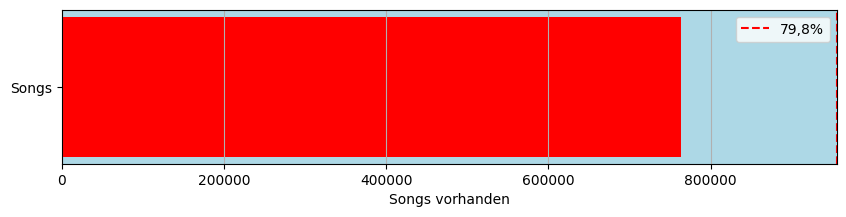

In [41]:
import matplotlib.pyplot as plt

# Erstelle Diagramm
max_value = 955320
filled_value = 762958
plt.figure(figsize=(10, 2))
plt.barh('Songs', filled_value, color='red')  # Balkenfarbe auf rot ändern
plt.xlim(0, max_value)  # Setze die x-Achse auf das Maximum
plt.xlabel('Songs vorhanden')
plt.grid(axis='x')
plt.axvline(x=max_value, color='red', linestyle='--', label='79,8%')
plt.legend()
plt.gca().set_facecolor('lightblue')

plt.show()

In [42]:
df2_save = unique_df2
df2_save.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725068 entries, 0 to 725067
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  725068 non-null  object 
 1   name                725061 non-null  object 
 2   album_name          283475 non-null  object 
 3   artists             725068 non-null  object 
 4   danceability        725068 non-null  float64
 5   energy              725068 non-null  float64
 6   key                 725068 non-null  Int8   
 7   loudness            725068 non-null  float64
 8   mode                725068 non-null  Int8   
 9   speechiness         725068 non-null  float64
 10  acousticness        725068 non-null  float64
 11  instrumentalness    725068 non-null  float64
 12  liveness            725068 non-null  float64
 13  valence             725068 non-null  float64
 14  tempo               725068 non-null  float64
 15  duration_ms         725068 non-nul

# Merged Dataframe: Daten zusammenführen

Im nächsten Schritt versuche ich, die beiden Datensätze zusammenzuführen, um die Textanalyse auf die Auswahl der besonders erfolgreichen Songs im Datensatz anzuwenden. 

Dazu versuche ich im ersten Schritt, die Daten anhand der Spotify-IDs zusammenzuführen und im zweiten Schritt die Daten anhand der Kombination aus Titelname und Künstlername zu kombinieren. 

Versuche, über eine API von Songdatenbanken die passenden Songtexte herunterzuladen sind leider fehlgeschlagen, deswegen füge ich die Texte aus der Lyrics-Spalte von df2 an.

In [43]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9945 entries, 0 to 9944
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9945 non-null   object 
 1   Track Name            9945 non-null   object 
 2   Artist URI(s)         9945 non-null   object 
 3   Artist Name(s)        9945 non-null   object 
 4   Album URI             9945 non-null   object 
 5   Album Name            9945 non-null   object 
 6   Album Artist URI(s)   9945 non-null   object 
 7   Album Artist Name(s)  9945 non-null   object 
 8   Album Release Date    9945 non-null   object 
 9   Album Image URL       9945 non-null   object 
 10  Disc Number           9945 non-null   int64  
 11  Track Number          9945 non-null   int64  
 12  Track Duration (ms)   9945 non-null   int64  
 13  Track Preview URL     9886 non-null   object 
 14  Explicit              9945 non-null   bool   
 15  Popularity           

Da ich in und unique_df1 und unique_df2 schon einige IDs gelöscht habe, füge ich die Datensätze noch mal anhand der ungefilterten Dataframes zusammen, um mehr Matches zu bekommen.

In [44]:
import pandas as pd

# Spalte 'Track URI' in df1 in ids umwandeln
df1_filtered['Track ID'] = df1_filtered['Track URI'].str.split(':').str[-1]

# Lyrics-Spalte für die passenden ids hinzufügen
df_merged = df1_filtered.merge(df2_filtered[['id', 'lyrics']], left_on='Track ID', right_on='id', how='left')

#df_merged = df1_filtered.merge(unique_df2[['id', 'lyrics']], left_on='Track ID', right_on='id', how='left')
# nur die Zeilen mit lyrics behalten
df_merged = df_merged[df_merged['lyrics'].notnull()]


print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4953 entries, 1 to 9941
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             4953 non-null   object 
 1   Track Name            4953 non-null   object 
 2   Artist URI(s)         4953 non-null   object 
 3   Artist Name(s)        4953 non-null   object 
 4   Album URI             4953 non-null   object 
 5   Album Name            4953 non-null   object 
 6   Album Artist URI(s)   4953 non-null   object 
 7   Album Artist Name(s)  4953 non-null   object 
 8   Album Release Date    4953 non-null   object 
 9   Album Image URL       4953 non-null   object 
 10  Disc Number           4953 non-null   int64  
 11  Track Number          4953 non-null   int64  
 12  Track Duration (ms)   4953 non-null   int64  
 13  Track Preview URL     4947 non-null   object 
 14  Explicit              4953 non-null   bool   
 15  Popularity            4953

Zwischenstand: df_merged beinhaltet 4953 entries, vielleicht finden sich noch mehr

#### Suchen von gleichen Titeln, bei denen die IDs nicht übereinstimmen, aber Titel, Artist und Album

In [45]:
import pandas as pd

# filtere nach Zeilen, die in Track Name und Artist Name gleich sind
df1_filtered_copy = df1_filtered[~df1_filtered.set_index(['Track Name', 'Artist Name(s)']).index.isin(
    df_merged.set_index(['Track Name', 'Artist Name(s)']).index
)]

# zweiter Merge-Join, um die lyrics-Spalte hinzuzufügen
new_rows = df1_filtered_copy.merge(df2_filtered[['name', 'artists', 'lyrics']], 
                               left_on=['Track Name', 'Artist Name(s)'], 
                               right_on=['name', 'artists'], 
                               how='left')

# behalte nur die Zeilen mit lyrics
new_rows = new_rows[new_rows['lyrics'].notnull()]
print(f"Anzahl der neuen Zeilen mit Lyrics: {new_rows.shape[0]}\n")

# zusätzliche Spalten entfernen
new_rows.drop(columns=['name', 'artists'], inplace=True)

# Schritt 8: Füge die neuen Zeilen zu df_merged hinzu
df_merged = pd.concat([df_merged, new_rows], ignore_index=True)
df_merged2 = df_merged.copy()

# Duplikate entfernen, basierend auf der Spalte 'Track ID'
df_merged = df_merged.drop_duplicates()

# Duplikate entfernen
#df_merged.drop(columns=['id', 'Track ID'], inplace=True, keep='First')
df_merged = df_merged.drop_duplicates(subset=['id', 'Track ID'], keep='first')
# df_merged enthält jetzt die ursprünglichen Daten und die neuen Zeilen mit lyrics
df_merged.info()


Anzahl der neuen Zeilen mit Lyrics: 1272

<class 'pandas.core.frame.DataFrame'>
Index: 5831 entries, 0 to 6224
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             5831 non-null   object 
 1   Track Name            5831 non-null   object 
 2   Artist URI(s)         5831 non-null   object 
 3   Artist Name(s)        5831 non-null   object 
 4   Album URI             5831 non-null   object 
 5   Album Name            5831 non-null   object 
 6   Album Artist URI(s)   5831 non-null   object 
 7   Album Artist Name(s)  5831 non-null   object 
 8   Album Release Date    5831 non-null   object 
 9   Album Image URL       5831 non-null   object 
 10  Disc Number           5831 non-null   int64  
 11  Track Number          5831 non-null   int64  
 12  Track Duration (ms)   5831 non-null   int64  
 13  Track Preview URL     5821 non-null   object 
 14  Explicit              5831 non-null

## Duplikate entfernen

Jetzt müssen noch mal die Duplikate entfernt werden, da ich ja nicht die unique_df Datensätze benutzt habe.

In [46]:
print("Anzahl der Zeilen vorher:", df_merged.shape[0])
vorher = df_merged.shape[0]

# 'lyrics_normalized' und 'lyrics_prefix' erstellen
df_merged['lyrics_normalized'] = df_merged['lyrics'].apply(clean_text)
df_merged['lyrics_prefix'] = df_merged['lyrics_normalized'].str[:200]
df_merged['name_prefix'] = df_merged['name_normalized'].str[:15]

# Duplikate entfernen, ersten behalten
df_merged = df_merged.drop_duplicates(subset=['artists_normalized', 'name_normalized'], keep='first').copy()
unique_df2 = unique_df2.drop_duplicates(subset=['artists_normalized', 'name_prefix'], keep='first')
df_merged = df_merged.drop_duplicates(subset=['Track URI'], keep='first').copy()
df_merged = df_merged.drop_duplicates(subset=['lyrics_prefix'], keep='first').copy()


print(f"Zeilen entfernt: {vorher - df_merged.shape[0]}")
print("Anzahl der Zeilen nachher:", df_merged.shape[0])

Anzahl der Zeilen vorher: 5831
Zeilen entfernt: 516
Anzahl der Zeilen nachher: 5315


## Ende: 5315 von 10.000 Songs mit Lyrics verknüpft

Ich habe in df_merged 5129 der 10.000 Songs aus df1 mit den Songtexten aus df2 verknüpfen können. 
Damit haben wir 5129 Hit-Songs mit Lyrics und können diese in einem späteren Schritt analysieren und mit dem großen Datensatz von fast 800.000 Lyrics des anderen DataFrames vergleichen.

So können wir mit df_merged arbeiten. Damit ist die Aufbereitung der Daten abgeschlossen und die Analyse kann beginnen. Jetzt werden noch mal alle Daten exportiert, um im nächsten Notebook damit zu arbeiten. Außerdem erstelle ich für den Machine Learning-Teil noch Dateien, die auf das Nötigste reduziert sind.

# Speichern

## DF1

In [47]:
df1_save.info()
df1_save.to_csv('df1_save.csv', index=False)
df1_save.to_parquet("df1_save.parquet", index=False, compression="snappy")
print("df1 gespeichert")

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 9944
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             8892 non-null   object 
 1   Track Name            8892 non-null   object 
 2   Artist URI(s)         8892 non-null   object 
 3   Artist Name(s)        8892 non-null   object 
 4   Album URI             8892 non-null   object 
 5   Album Name            8892 non-null   object 
 6   Album Artist URI(s)   8892 non-null   object 
 7   Album Artist Name(s)  8892 non-null   object 
 8   Album Release Date    8892 non-null   object 
 9   Album Image URL       8892 non-null   object 
 10  Disc Number           8892 non-null   int64  
 11  Track Number          8892 non-null   int64  
 12  Track Duration (ms)   8892 non-null   int64  
 13  Track Preview URL     8835 non-null   object 
 14  Explicit              8892 non-null   bool   
 15  Popularity            8892

DF1 für Machine Learning vorbereiten: Alle unnötigen Spalten löschen

In [48]:
import pandas as pd

df1_save['Track ID'] = df1_save['Track URI'].str.split(':').str[-1]

cols = [
    'Track ID',
    'Track Name',
    'name_normalized',
    'Artist Name(s)',        # "Artist Name" in deiner Beschreibung; Spaltenname laut Übersicht ist "Artist Name(s)"
    'artists_normalized',
    'Track Duration (ms)',
    # Spotify-Features: alle Spalten von Danceability bis Time Signature plus ggf. Valence/Tempo etc.
    'Danceability','Energy','Key','Loudness','Mode',
    'Speechiness','Acousticness','Instrumentalness','Liveness','Valence',
    'Tempo','Time Signature'
]

# Auswahl (falls eine Spalte fehlen könnte, nur vorhandene behalten)
#existing = [c for c in cols if c in df.columns]
df1_ml = df1_save[cols].copy()
df1_ml.head()

,Track ID,Track Name,name_normalized,Artist Name(s),artists_normalized,Track Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,0vNPJrUrBnMFdCs8b2MTNG,Fader,fader,The Temper Trap,the temper trap,192373,0.532,0.760,11.0,-7.123,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0
1,0NpvdCO506uO58D4AbKzki,Sherry,sherry,Frankie Valli & The Four Seasons,frankie valli the four seasons,152160,0.703,0.478,7.0,-8.062,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0
2,1MtUq6Wp1eQ8PC6BbPCj8P,I Took A Pill In Ibiza - Seeb Remix,i took a pill in ibiza seeb remix,"Mike Posner, Seeb",mike posner seeb,197933,0.664,0.714,7.0,-6.645,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0
3,59lq75uFIqzUZcgZ4CbqFG,Let Go for Tonight,let go for tonight,Foxes,foxes,238413,0.543,0.808,9.0,-6.615,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0
4,7KdcZQ3GJeGdserhK61kfv,The Way I Want To Touch You,the way i want to touch you,Captain & Tennille,captain tennille,163586,0.664,0.585,0.0,-7.062,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0


In [49]:
df1_ml.to_csv('df1_ml.csv', index=False)
df1_ml.to_parquet("df1_ml.parquet", index=False, compression="snappy")
print("df1_ml gespeichert")

df1_ml gespeichert


## DF2

In [50]:
df2_save.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725068 entries, 0 to 725067
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  725068 non-null  object 
 1   name                725061 non-null  object 
 2   album_name          283475 non-null  object 
 3   artists             725068 non-null  object 
 4   danceability        725068 non-null  float64
 5   energy              725068 non-null  float64
 6   key                 725068 non-null  Int8   
 7   loudness            725068 non-null  float64
 8   mode                725068 non-null  Int8   
 9   speechiness         725068 non-null  float64
 10  acousticness        725068 non-null  float64
 11  instrumentalness    725068 non-null  float64
 12  liveness            725068 non-null  float64
 13  valence             725068 non-null  float64
 14  tempo               725068 non-null  float64
 15  duration_ms         725068 non-nul

In [51]:
# überflüssige Spalten rauswerfen
df2_save = unique_df2.drop(columns=['name_prefix', 'lyrics_prefix'])
df2_save.to_csv('df2_save.csv', index=False)
df2_save.to_parquet("df2_save.parquet", index=False, compression="snappy")
print("df2_save gespeichert")

df2_save gespeichert


DF2 für Machine Learning vorbereiten:

In [52]:
df2_ml = unique_df2.drop(columns=['album_name', 'lyrics', 'lyrics_normalized'])
#df2_ml = unique_df2.drop(columns=['name_prefix'])
df2_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725068 entries, 0 to 725067
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  725068 non-null  object 
 1   name                725061 non-null  object 
 2   artists             725068 non-null  object 
 3   danceability        725068 non-null  float64
 4   energy              725068 non-null  float64
 5   key                 725068 non-null  Int8   
 6   loudness            725068 non-null  float64
 7   mode                725068 non-null  Int8   
 8   speechiness         725068 non-null  float64
 9   acousticness        725068 non-null  float64
 10  instrumentalness    725068 non-null  float64
 11  liveness            725068 non-null  float64
 12  valence             725068 non-null  float64
 13  tempo               725068 non-null  float64
 14  duration_ms         725068 non-null  float64
 15  artists_normalized  725068 non-nul

In [53]:
df2_ml.to_csv('df2_ml.csv', index=False)
df2_ml.to_parquet("df2_ml.parquet", index=False, compression="snappy")
print("df2_ml gespeichert")

df2_ml gespeichert


## DF_Merged

In [54]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5315 entries, 0 to 6224
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             5315 non-null   object 
 1   Track Name            5315 non-null   object 
 2   Artist URI(s)         5315 non-null   object 
 3   Artist Name(s)        5315 non-null   object 
 4   Album URI             5315 non-null   object 
 5   Album Name            5315 non-null   object 
 6   Album Artist URI(s)   5315 non-null   object 
 7   Album Artist Name(s)  5315 non-null   object 
 8   Album Release Date    5315 non-null   object 
 9   Album Image URL       5315 non-null   object 
 10  Disc Number           5315 non-null   int64  
 11  Track Number          5315 non-null   int64  
 12  Track Duration (ms)   5315 non-null   int64  
 13  Track Preview URL     5305 non-null   object 
 14  Explicit              5315 non-null   bool   
 15  Popularity            5315

In [55]:
df_merged.to_csv('df_merged.csv', index=False)
df_merged.to_parquet("df_merged.parquet", index=False, compression="snappy")
print("df_merged gespeichert")

df_merged gespeichert


Im nächsten Notebook geht es weiter zur Datenanalyse.